1- read and explore data
2- check on missing values and duplicates and handle it 
3- handle categorical data and encode it
4- check on distribution of numerical continous and discrete data
5- apply correlation between numerical continous columns
6- split data to x, y 
7- detect outliers using IQR using boolean indexing and visualize it
8- check on imblanacind label and visualize it
9- check on data range and apply normalization
10 - apply standrization and visualize data to see if distibuted of data is affected or not
11- apply robust scaling to see if it reduce outlier effect or not

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1
df = pd.read_csv('Churn_Modelling.csv')
print(df.head())
print(df.info())
print(df.describe())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
#2 

print(df.isnull().sum())
print(f'Duplicates: {df.duplicated().sum()}')

df = df.drop_duplicates()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Duplicates: 0


In [6]:
#3

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


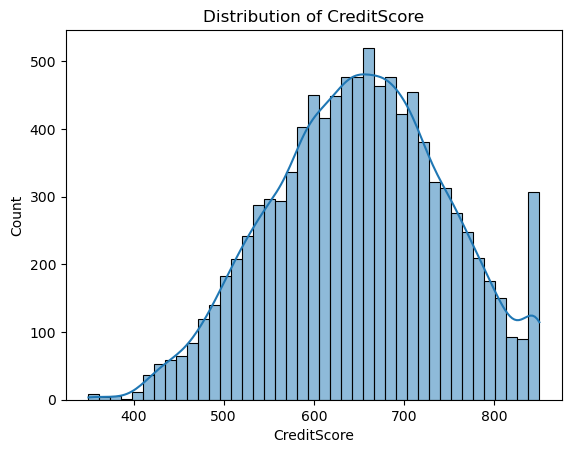

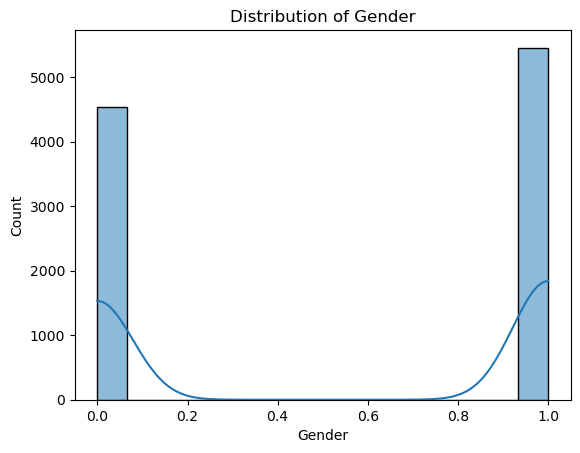

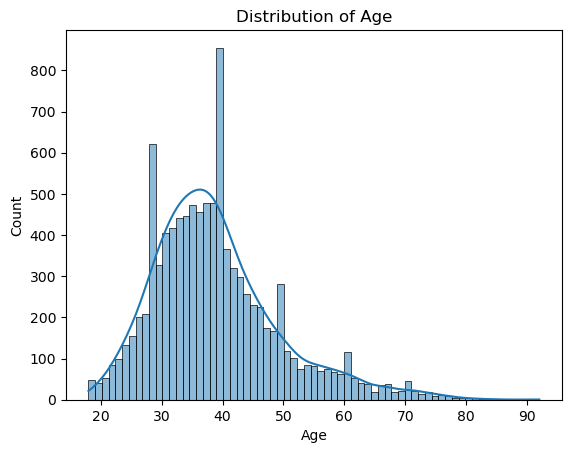

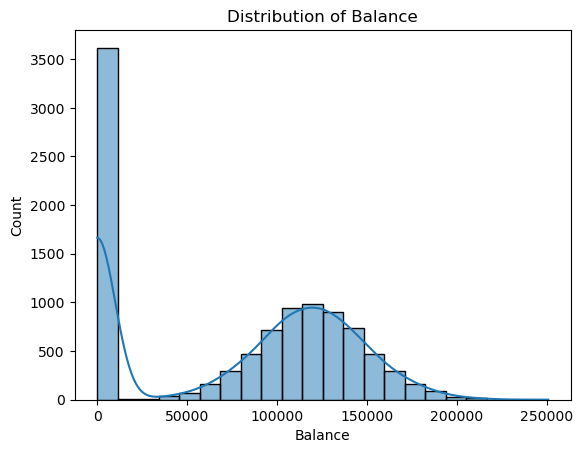

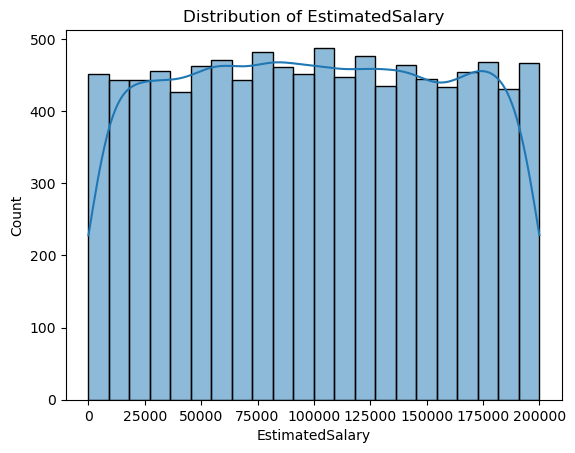

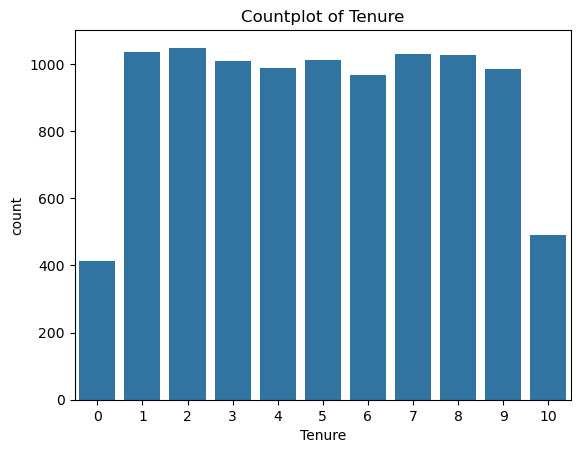

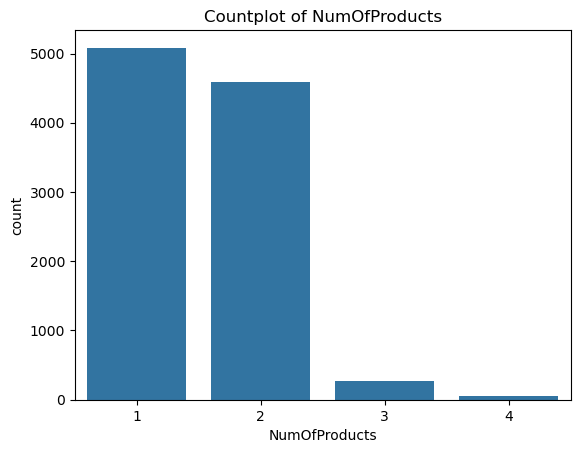

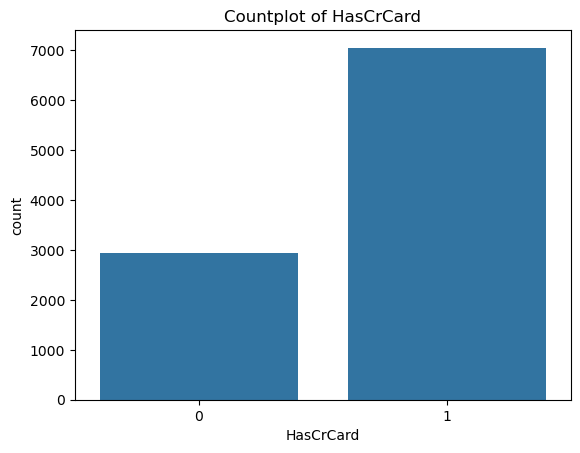

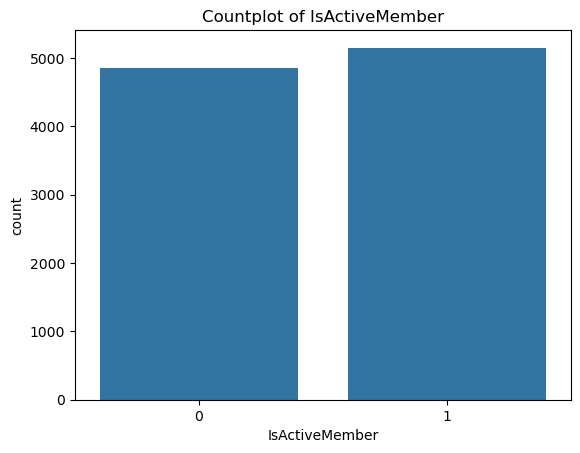

In [ ]:
#4

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
discrete = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
continuous = [col for col in num_cols if col not in discrete + ['Exited']]

for col in continuous:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in discrete:
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()


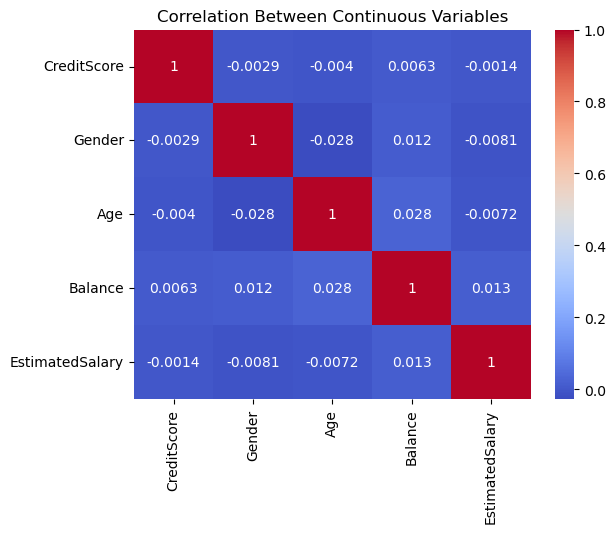

In [8]:
#5

corr = df[continuous].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Continuous Variables')
plt.show()


In [9]:
#6

X = df.drop('Exited', axis=1)
y = df['Exited']


CreditScore: 15 outliers


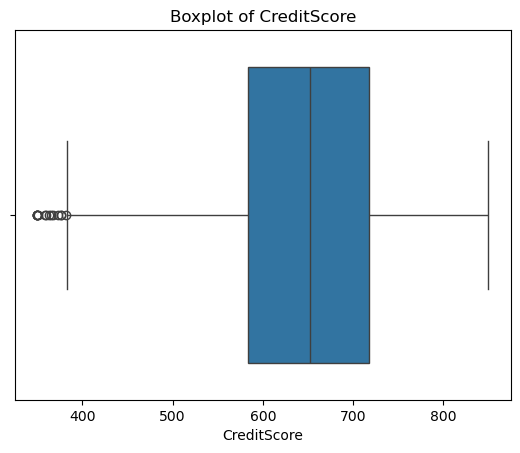

Gender: 0 outliers


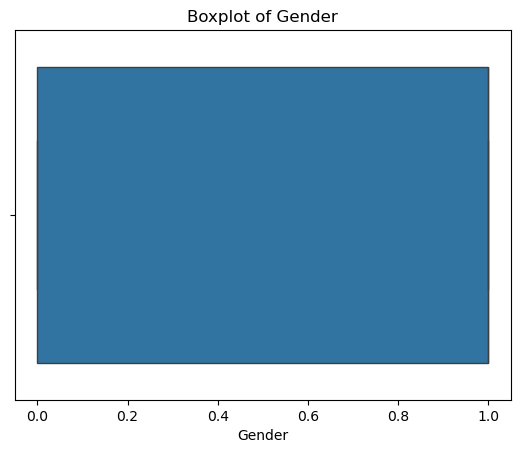

Age: 359 outliers


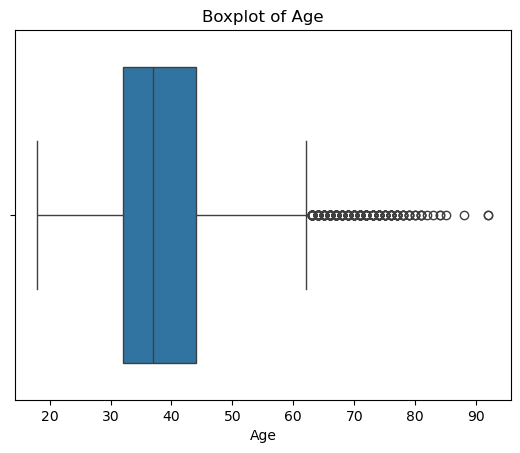

Balance: 0 outliers


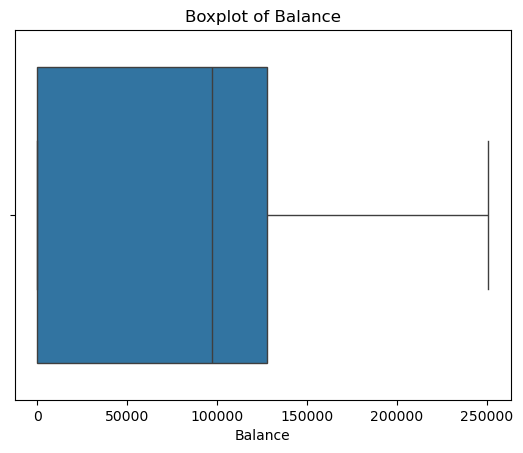

EstimatedSalary: 0 outliers


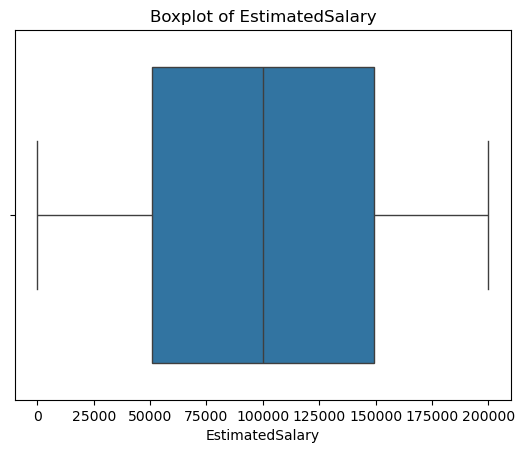

In [10]:
#7

def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

for col in continuous:
    outliers = detect_outliers_iqr(col)
    print(f'{col}: {len(outliers)} outliers')
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


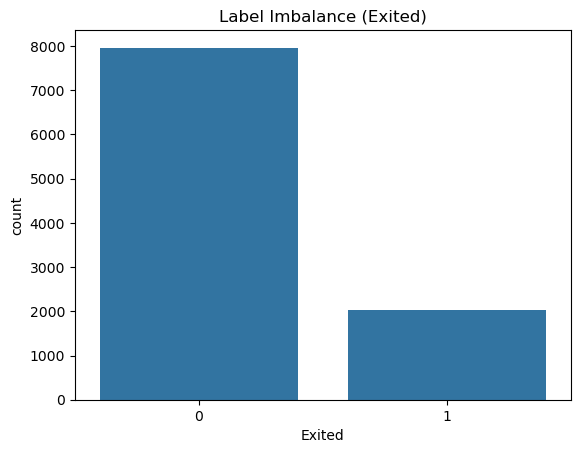

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [11]:
#8
sns.countplot(x=y)
plt.title('Label Imbalance (Exited)')
plt.show()

print(y.value_counts(normalize=True) * 100)


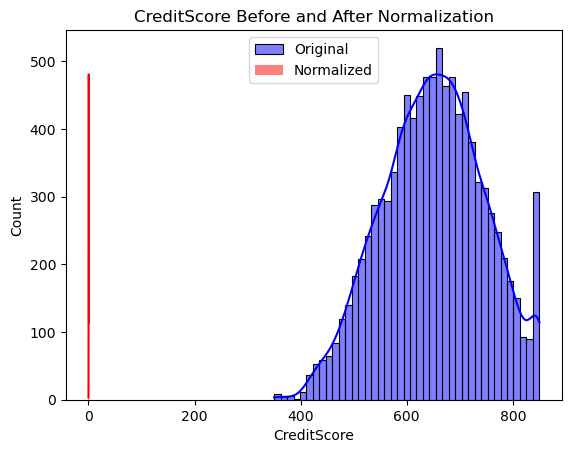

In [13]:
#9 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

sns.histplot(X['CreditScore'], color='blue', label='Original', kde=True)
sns.histplot(X_normalized['CreditScore'], color='red', label='Normalized', kde=True)
plt.legend()
plt.title('CreditScore Before and After Normalization')
plt.show()


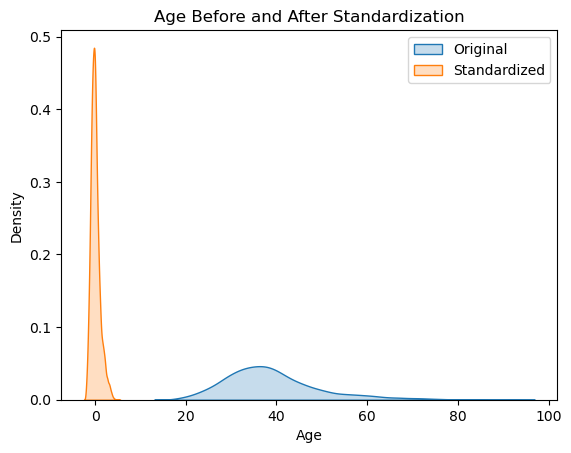

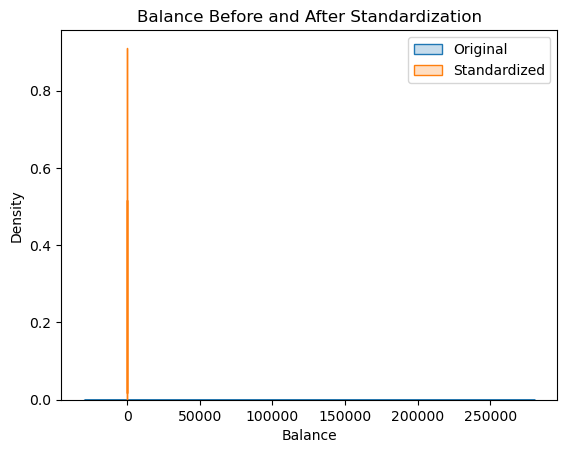

In [14]:
#10

scaler_std = StandardScaler()
X_standardized = pd.DataFrame(scaler_std.fit_transform(X), columns=X.columns)

for col in ['Age', 'Balance']:
    sns.kdeplot(X[col], label='Original', fill=True)
    sns.kdeplot(X_standardized[col], label='Standardized', fill=True)
    plt.title(f'{col} Before and After Standardization')
    plt.legend()
    plt.show()


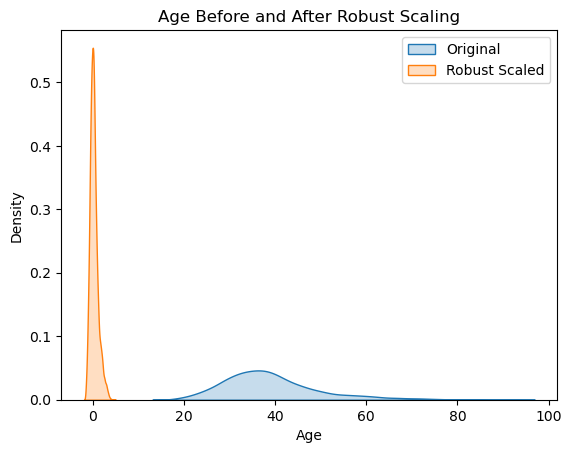

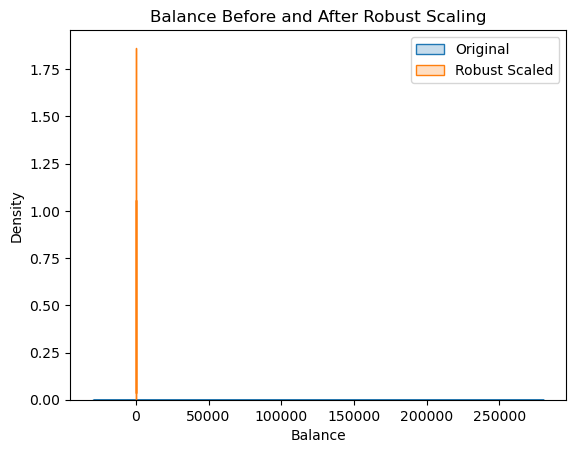

In [15]:
#11

scaler_robust = RobustScaler()
X_robust = pd.DataFrame(scaler_robust.fit_transform(X), columns=X.columns)

for col in ['Age', 'Balance']:
    sns.kdeplot(X[col], label='Original', fill=True)
    sns.kdeplot(X_robust[col], label='Robust Scaled', fill=True)
    plt.title(f'{col} Before and After Robust Scaling')
    plt.legend()
    plt.show()
